## Qualitative Daten
Bei Qualitativen Daten handelt es sich um nicht numerische, meist verschriftlichen Daten.

Zur Visualisierung von quantitativen Daten werden meist Säulendiagramme und Streudiagramme verwendet.

Zur Darstellung in Python kann die `seaborn` Plotting Library verwendet werden. Die nächsten Beispiele werden mit dieser Library und dem Datensatz Titanic (`titanic.csv`) realisiert.

In [2]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
    
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

In [15]:
# Load the dataset in Python
# Use seaborn github dataset: ti = sns.load_dataset('titanic').reset_index(drop=True)
# Load dataset locally
ti = pd.read_csv('../datasets/titanic-seaborn.csv').reset_index(drop=True)
# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
# df_interact(ti)

In [4]:
# HIDDEN
# Enable R in Python notebook
%load_ext rpy2.ipython

In [44]:
%%R
# Init libraries
install.packages("lmtest", repos="https://cran.wu.ac.at/")
install.packages("vcd", repos="https://cran.wu.ac.at/")
install.packages("ggplot2", repos="https://cran.wu.ac.at/")
library(vcd)
library(ggplot2)

In [228]:
%%R
# Load the dataset in R and drop N/A values to make plot function calls simpler
ti <- read.csv("../datasets/titanic-seaborn.csv", header = TRUE, sep=",")

### Balkendiagramme (Bar Charts)


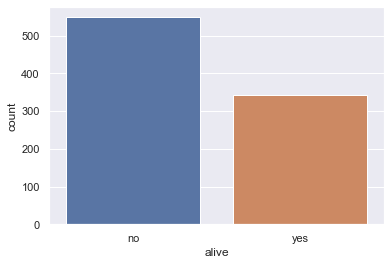

In [16]:
# Counts how many passengers survived and didn't survive and
# draws bars with corresponding heights
sns.countplot(x='alive', data=ti);

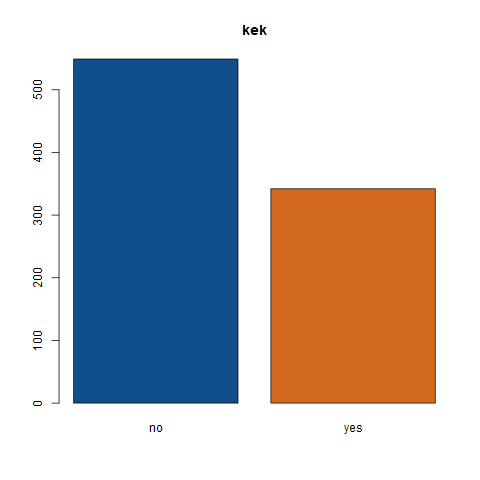

In [21]:
%%R
# Countplots in R: https://www.statmethods.net/graphs/bar.html
# Create counts from alive colum
counts <- table(ti$alive)
barplot(counts, main="kek", col=c("dodgerblue4", "chocolate"))

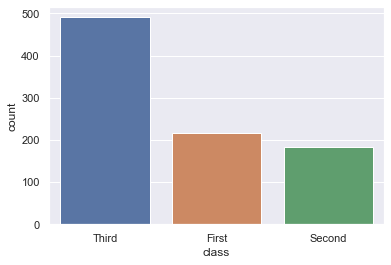

In [22]:
sns.countplot(x='class', data=ti);

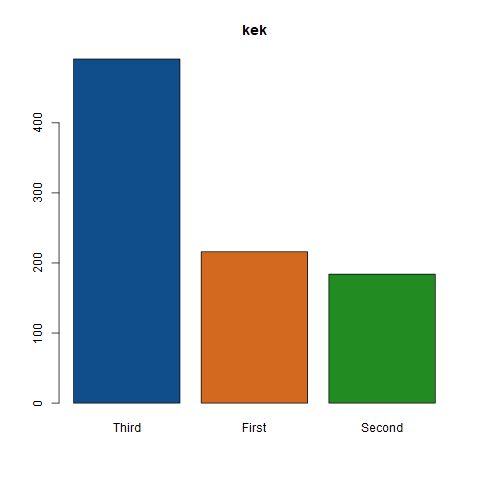

In [25]:
%%R
counts <- table(ti$class)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(sort(counts, decreasing=TRUE), main="kek", col=c("dodgerblue4", "chocolate", "forestgreen"))

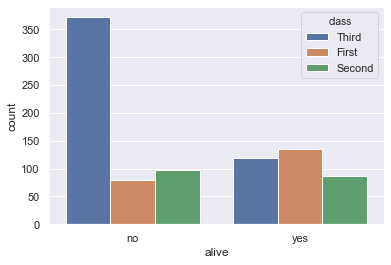

In [26]:
# As with box plots, we can break down each category further using color
sns.countplot(x='alive', hue='class', data=ti);

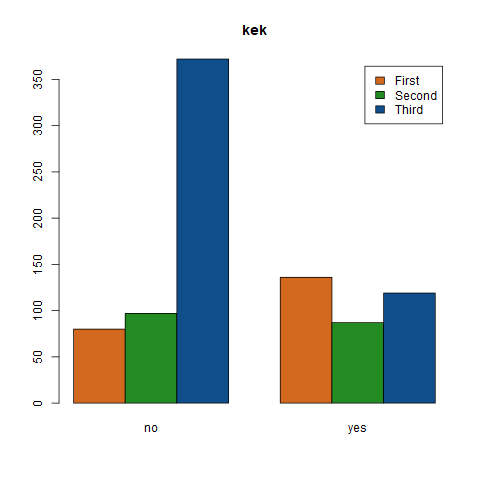

In [39]:
%%R
counts <- table(ti$class, ti$alive)
# Order like seaborn: https://stackoverflow.com/a/56808968
barplot(counts, main="kek", col=c("chocolate", "forestgreen", "dodgerblue4"),
    legend = rownames(counts), beside=TRUE
)

Barplots! Ahh

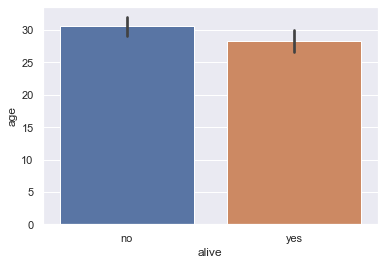

In [42]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.barplot(x='alive', y='age', data=ti);

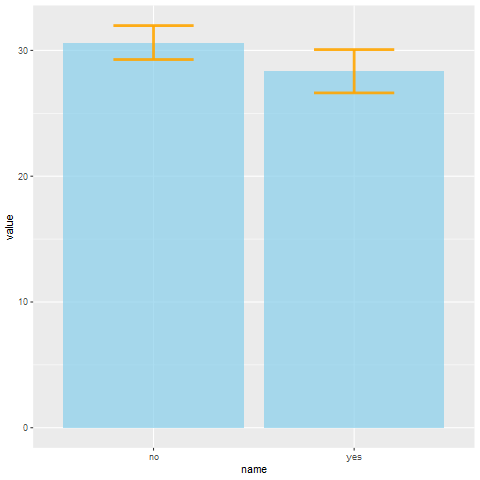

In [253]:
%%R
if(FALSE) {
counts <- c(mean(na.omit(ti$age[ti$alive=="yes"])), mean(na.omit(ti$age[ti$alive=="no"])))
barplot(sort(counts, decreasing=TRUE), xlab="alive", ylab="age",col=c("dodgerblue4", "chocolate"))

print(se(na.omit(ti$age[ti$alive=="yes"])))
print(se(na.omit(ti$age[ti$alive=="no"])))

tabbedMeans  <- c(mean(na.omit(ti$age[ti$alive=="yes"])), mean(na.omit(ti$age[ti$alive=="no"])))
tabbedSE  <- c(se(na.omit(ti$age[ti$alive=="yes"])), se(na.omit(ti$age[ti$alive=="no"])))
barCenters <- barplot(sort(counts, decreasing=TRUE), xlab="alive", ylab="age",col=c("dodgerblue4", "chocolate"))

#arrows(x0=barCenters,y0=df$bar+df$error,y1=df$bar-df$error,angle=90,code=3,length=0.1)
    
    meanvals=c(mean(vals[1]), mean(vals[2]))
sevals=c(ci(vals[1]), ci(vals[2]))
p#rint(sevals[1])



}

se <- function(x) sd(x)/sqrt(length(x))
ci <- function(x) {
    qnorm(0.975)*sd(x)/sqrt(length(x))
}
alive <- na.omit(ti$age[ti$alive=="yes"])
dead <- na.omit(ti$age[ti$alive=="no"])              
meanvals <- c(mean(alive), mean(dead))
civals <- c(ci(alive), ci(dead))
print(meanvals[1])
print(meanvals[2])
print(civals[1])
print(civals[2])
#print(qnorm(0.975)*sd(ti$age[ti$alive=="yes"])/sqrt(ti$age[ti$alive=="yes"]))

data <- data.frame(
  name=c("yes", "no"),
  value=meanvals,
  sd=civals
)
 
# Most basic error bar
ggplot(data) +
    geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.7) +
    geom_errorbar( aes(x=name, ymin=value-sd, ymax=value+sd), width=0.4, colour="orange", alpha=0.9, size=1.3)


Werte berechnen

In [41]:
ti[['alive', 'age']].groupby('alive').mean()

,age
alive,
no,30.63
yes,28.34


In [139]:
%%R
# Aggregate function: https://stackoverflow.com/a/21983076/12347616
# Set names: https://stackoverflow.com/a/15309223/12347616
result <- setNames(aggregate(na.omit(ti$age), list(alive = ti$alive[!(is.na(ti$age))]), mean), c("alive", "age"))
result

Ohne Kondifenzintervalle

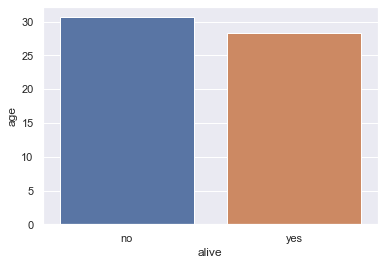

In [229]:
sns.barplot(x='alive', y='age', data=ti, ci=False);

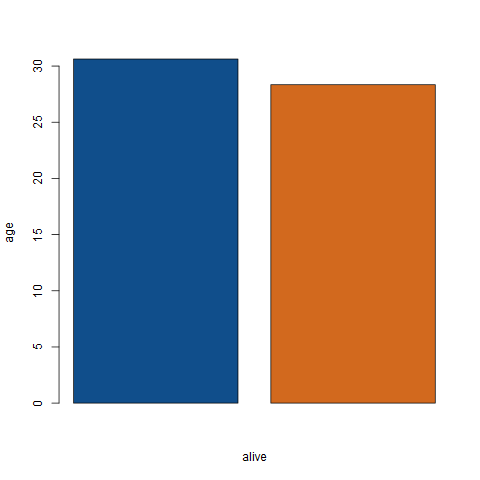

In [230]:
%%R
counts <- c(mean(na.omit(ti$age[ti$alive=="yes"])), mean(na.omit(ti$age[ti$alive=="no"])))
barplot(sort(counts, decreasing=TRUE), xlab="alive", ylab="age",col=c("dodgerblue4", "chocolate"))

## Prinzipien der Visualisierung

## Prinzipien der Visualisierung II

## Visualisierungs Philosophie